# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 6. 10. 2024. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

> ❌ Zkopírovaný kód ze cvičení (především ze cvičení 2) nebude uznán!

> ‼️ Akceptovatelný je úkol pouze v češtině, slovenštině nebo angličtině.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

## *✨ Příprava dat*

 **Importujme potřebné balíčky**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

 **Načtěme si dataset intakes**

In [2]:
intakes = pd.read_csv('intakes.csv', delimiter=',')

**Seznámení s datasetem intakes**

In [3]:
intakes.info()
intakes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


`Všechny` přiznaky májí type `object`, musíme to potom `upravít`

Take máme dost `null-hodnot` v sloupcí **Name**

**Načtěme si dataset outcomes**

In [4]:
outcomes = pd.read_csv('outcomes.csv', delimiter=',')

**Seznámení s datasetem outcomes**

In [5]:
outcomes.info()
outcomes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


Opět `všechny přiznaky` májí type `object`, musíme to potom `upravít`

Take máme dost `null-hodnot` v různých sloupcích

**Odstraníme null-hodnoty, dublicitní zaznamy a nastavíme typ category**

In [6]:
# odstranime to, co by tam mohlo byt
intakes = intakes.replace(["Unknown", "N/A", "None", "-", "?", ""], np.nan)
outcomes = outcomes.replace(["Unknown", "N/A", "None", "-", "?", ""], np.nan)

# odstranime dublicitni zaznamy
intakes.drop_duplicates(inplace=True)
outcomes.drop_duplicates(inplace=True)

# sloupce v intakes, kterym nastavim typ 'category'
categorical_columns1 = [
    'Animal ID', 'Name', 'MonthYear', 'Found Location', 'Intake Type',
    'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color'
]
for column in categorical_columns1:
    intakes[column] = intakes[column].astype('category') 

# sloupce v outcomes, kterym nastavim typ 'category'
categorical_columns2 = [
    'Animal ID', 'Name', 'MonthYear', 'Date of Birth', 'Outcome Type',
    'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color'
]
for column in categorical_columns2:
    outcomes[column] = outcomes[column].astype('category')

**Funkce, která převede Age upon Intake/Outcome na věk v letéch (float)**

In [7]:
#zvolila jsem prevest na vek v letech, protoze toto pomuze lepe vizualizovat data
def age_to_years(age_str):
    if pd.isna(age_str):
        return np.nan
    num, unit = age_str.split()
    num = int(num)
    if num < 0: return np.nan
    if 'day' in unit: return num/365
    elif 'week' in unit: return num/52
    elif 'month' in unit: return num/12
    elif 'year' in unit: return num
    return np.nan

In [8]:
intakes['Age upon Intake'] = intakes['Age upon Intake'].apply(age_to_years)
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].apply(age_to_years)

**Převedeme DateTime na spravný datový format (datetime64)**

In [9]:
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], format='%m/%d/%Y %I:%M:%S %p')
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], format='%m/%d/%Y %I:%M:%S %p')

**Ve jmenách zviřat jindy vidíme format  `*jméno`. Opravíme toto:**

In [10]:
intakes['Name']=intakes['Name'].str.replace(r'^\*', '', regex=True)
outcomes['Name']=outcomes['Name'].str.replace(r'^\*', '', regex=True)

**Odstraníme MonthYear, stejnou informaci už máme v DateTime**

In [11]:
intakes.drop("MonthYear", inplace=True, axis=1)
outcomes.drop("MonthYear", inplace=True, axis=1)

## *🖊️ Deskriptivní statistiky*

##### **Age upon Intake**

**Protože Age upon Intake a DateTime jsou `continuous` data, použiju vizualizace pro popis cont. dat, což bude Histogram a Boxplot pro lepší vizualizaci**

Boxplot se používá pro vizualizaci centrální tendence a rozptýlení dat prostřednictvím mediánu a odlehlých hodnot. Umožňuje rychlé srovnání skupin a identifikaci odlehlých hodnot. Histogram zobrazuje frekvenci výskytu hodnot v určitých intervalech, čímž odhaluje tvar distribuce dat a jejich hustotu. 

count    138557.000000
mean          2.029140
std           2.857817
min           0.000000
25%           0.166667
50%           1.000000
75%           2.000000
max          30.000000
Name: Age upon Intake, dtype: float64


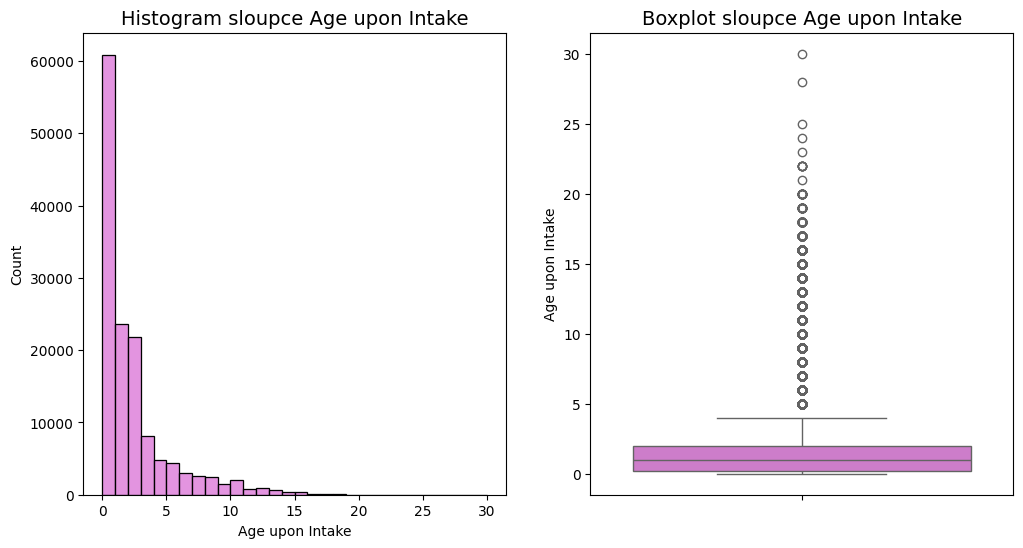

In [12]:
# definujeme základní barvu pro grafy
basic_color = 'orchid'

# vypis popis veku
print(intakes['Age upon Intake'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
# histogram
sns.histplot(data=intakes, x='Age upon Intake', kde=False, ax=ax1, color=basic_color, bins=30)
ax1.set_title('Histogram sloupce ' + 'Age upon Intake', fontsize=14)
    
# boxplot
sns.boxplot(data=intakes, y='Age upon Intake', ax=ax2, color=basic_color)
ax2.set_title('Boxplot sloupce ' + 'Age upon Intake', fontsize=14)
plt.show()

Vidíme, jakou `střední hodnotu` má věk zviřete při přijetí `(1 rok)`, maximalní věk (30 let), a to, že `75% zvířat má věk <= 2`.

##### **DateTime**

**Podíváme se na zaznamy tohoto sloupce:**

In [13]:
intakes['DateTime'].describe()

count                           138565
mean     2017-09-03 04:33:46.595749120
min                2013-10-01 07:51:00
25%                2015-08-12 18:29:00
50%                2017-07-20 16:44:00
75%                2019-07-08 11:25:00
max                2022-04-27 07:54:00
Name: DateTime, dtype: object

Máme zaznamy v období `2013 až 2022`

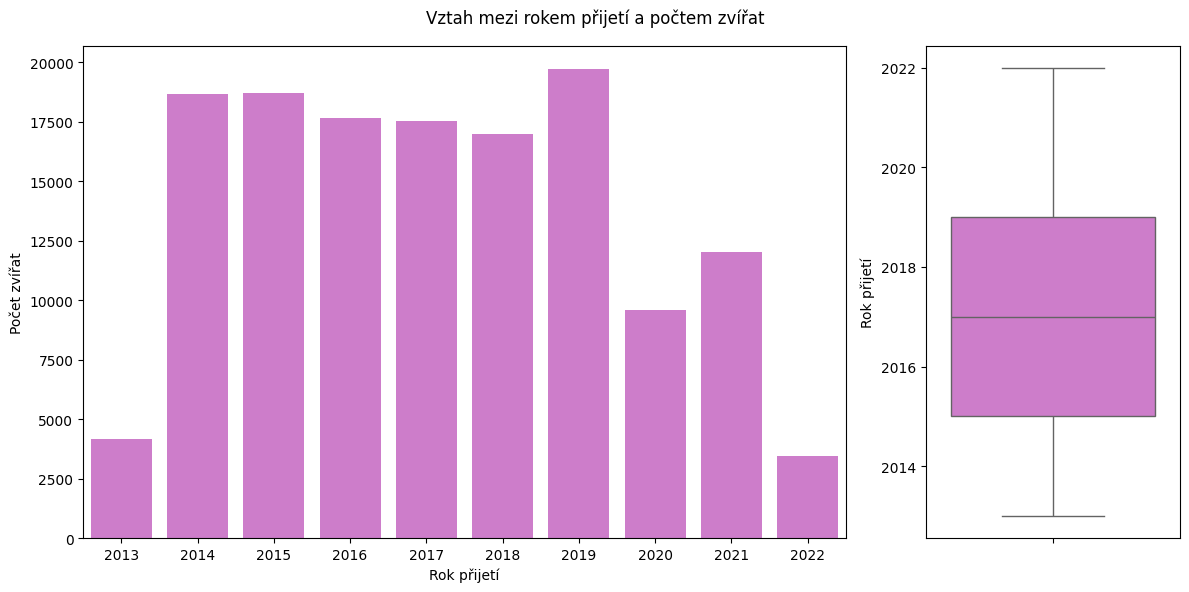

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={"width_ratios": [3, 1]})
sns.countplot(data=intakes, x=intakes["DateTime"].dt.year, ax=ax1, color=basic_color)
ax1.set_xlabel("Rok přijetí")
ax1.set_ylabel("Počet zvířat")
sns.boxplot(y=intakes["DateTime"].dt.year, ax=ax2, color=basic_color)
fig.suptitle("Vztah mezi rokem přijetí a počtem zvířat")
ax2.set_ylabel("Rok přijetí")
plt.tight_layout()

Vidíme, že v roce `2014 - 2019` byl počet přijatých zvířat za rok stabilně vysoký, a poté v roce `2020` je pozorován velký pokles v počtu zaznamů. V čase `2020 - 2022` je počet přijatých zviřat téměř o polovinu nižší než v předchozích `6` letech. 

##### **Funkce pro popis categorických dat:**

Pro vizualizaci kategoriálních dat použíju bar plot a donut chart, protože oba umožňují snadné porovnání velikosti kategorií. Bar plot intuitivně zobrazuje rozdíly mezi kategoriemi, což je snadno srozumitelné. Donut chart, který je variantou pie chartu, je považován za lepší díky čistšímu designu a lepší čitelnosti. Lidé lépe rozlišují velikosti sektorů než úhly, takže donut chart je přehlednější než pie chart. 

In [15]:
def univariate_cat_ds(df, column):
    # zobrazim pocet a relativni pocet kazde kategorie
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency (%)': (df[column].value_counts(normalize=True) * 100).round(2)
    })
    display(stats_df)
    ordered_categories = stats_df.index

    # nastavim barvy aby byly stejne pro bar plot a pie chart
    colors = sns.color_palette('PuRd', n_colors=len(ordered_categories))
    sorted_colors = {k: colors[i] for i, k in enumerate(ordered_categories)}

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # bar plot
    ax1.grid(True, axis='y')
    sns.countplot(data=df, x=column, hue=column, order=ordered_categories, palette=sorted_colors, ax=ax1, legend=False)

    # podepiseme sloupce
    for container in ax1.containers:
        ax1.bar_label(container, label_type='edge', fontsize=12, padding=3)

    ax1.set_ylabel('Frequency', fontsize=14, fontweight='bold')
    ax1.set_xlabel(column, fontsize=14, fontweight='bold')

    # donut chart
    wedges, texts = ax2.pie(stats_df['Frequency'], colors=[sorted_colors[k] for k in ordered_categories], wedgeprops={'width': 0.5})
    ax2.legend(wedges, ordered_categories, title=f"{column}", loc="best")

    plt.axis('equal')
    plt.gca().set_aspect('equal')
    fig.suptitle(f'Deskriptivni statistika pro {column}', fontsize=16)
    plt.tight_layout()
    plt.show()

##### **Sex upon Intake**

,Frequency,Relative frequency (%)
Sex upon Intake,,
Intact Male,45629,35.79
Intact Female,43303,33.96
Neutered Male,20835,16.34
Spayed Female,17731,13.91


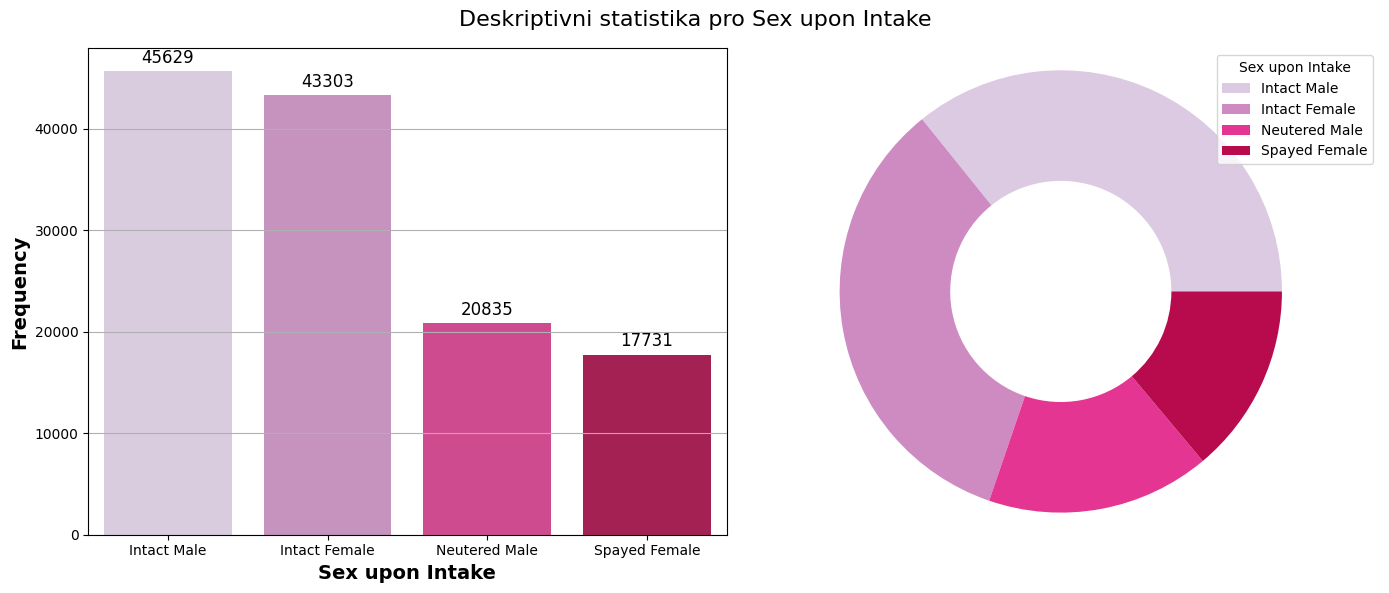

In [16]:
univariate_cat_ds(intakes, 'Sex upon Intake')

Z grafu je vidět, že počet `kastrovaných zvířat` při `přijetí` je `přibližně dvakrát menší` než počet `nekastrovaných`. Zároveň je počet `samců` a `samic` v každé skupině `přibližně stejný`.

##### **Sex upon Outcome**

,Frequency,Relative frequency (%)
Sex upon Outcome,,
Neutered Male,48869,38.27
Spayed Female,44056,34.50
Intact Male,17635,13.81
Intact Female,17140,13.42


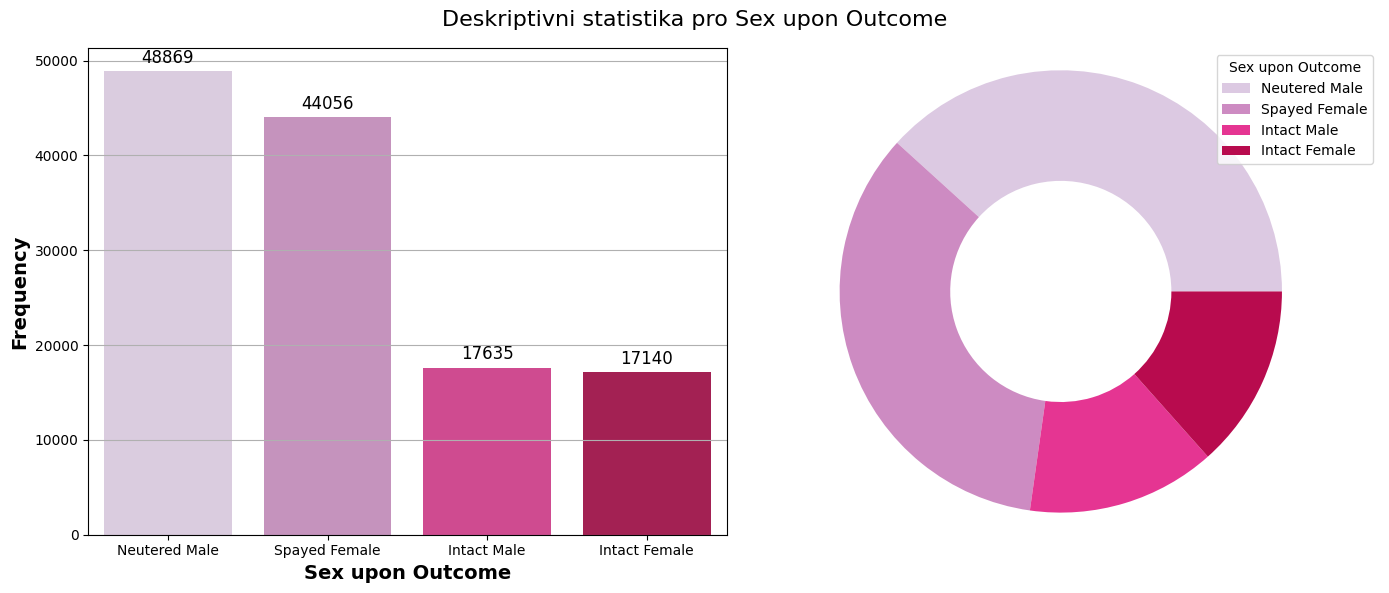

In [17]:
univariate_cat_ds(outcomes, 'Sex upon Outcome')

Z grafu je vidět, že počet `kastrovaných zvířat` při `opuštění` útulku je `přibližně třikrát větší` než počet `nekastrovaných`. Zároveň je počet `samců` a `samic` v každé skupině `přibližně stejný`.

##### **Animal Type (intakes)**

*`Protože relativní četnost skupin Bird a Livestock je přiliš malá pro zobrazení na grafu, udělala jsem z toho 1 skupinu:`*

C:\Users\maryt\AppData\Local\Temp\ipykernel_12528\580447208.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_combined['Animal Type'] = df_combined['Animal Type'].replace({'Livestock': 'Livestock & Bird', 'Bird': 'Livestock & Bird'})


,Frequency,Relative frequency (%)
Animal Type,,
Dog,78135,56.39
Cat,52373,37.80
Other,7372,5.32
Livestock & Bird,685,0.49


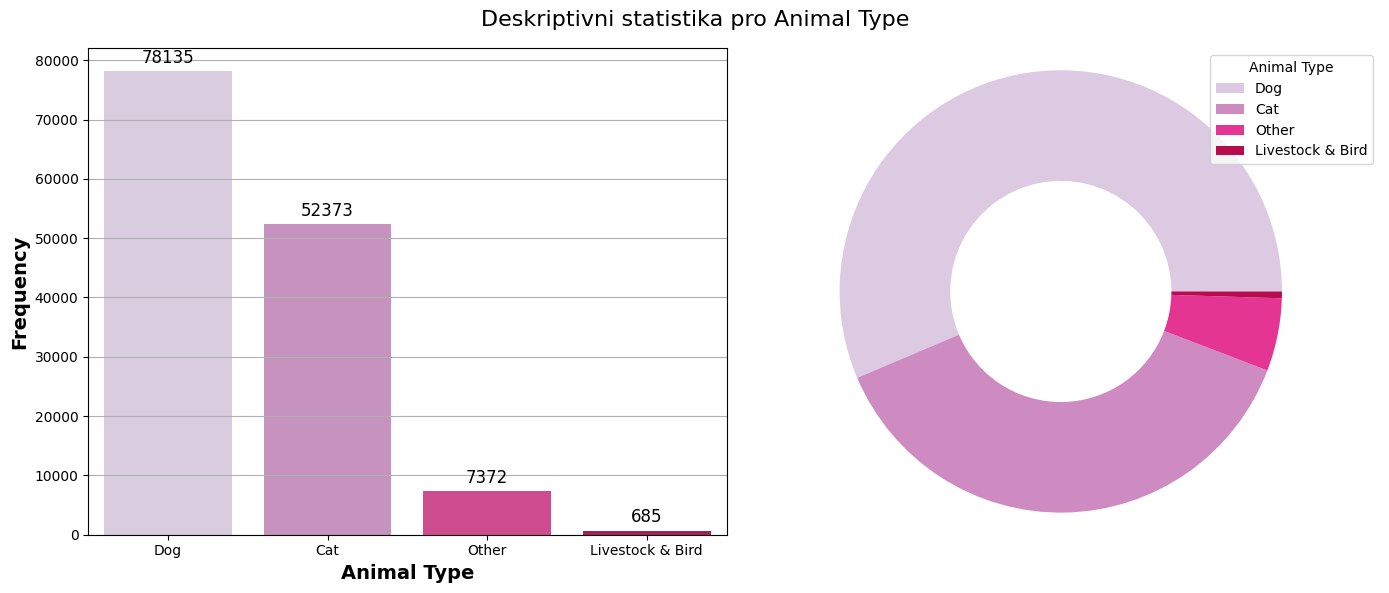

In [18]:
df_combined = intakes.copy()
df_combined['Animal Type'] = df_combined['Animal Type'].replace({'Livestock': 'Livestock & Bird', 'Bird': 'Livestock & Bird'})
univariate_cat_ds(df_combined, 'Animal Type') 

Z grafu je vidět, že `většina` zvířat v útulku jsou `psi`, na `druhém místě` jsou `kočky` a `ostatních` druhů je `mnohem méně`.

##### **Outcome Type a Animal Type** 

**Protože Outcome Type a Animal Type jsou `categorical` data, použijeme postup pro popis cat. dat**

Logaritmus se v tomto kódu používá k transformaci dat v kontingenční tabulce pro tepelné mapy, protože zmenšuje rozsah hodnot a zvyšuje viditelnost menších rozdílů mezi kategoriemi. Přidáním +1 k hodnotám se zabraňuje problémům s logaritmováním nul, což by vedlo k neplatným hodnotám.

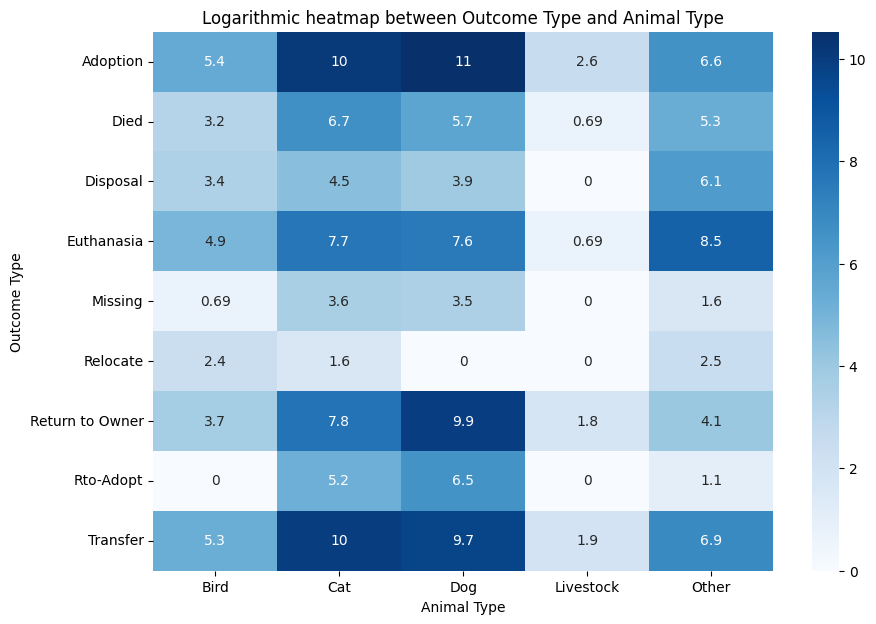

In [19]:
ct = pd.crosstab(outcomes['Outcome Type'], outcomes['Animal Type'])

ct_log = np.log(ct + 1)
plt.figure(figsize=(10,7))
sns.heatmap(ct_log,  annot=True, cbar=True, cmap='Blues')
plt.title("Logarithmic heatmap between Outcome Type and Animal Type")
plt.show()

Z tohoto grafu vidíme, že `nejčastěji adoptovanými` zvířaty jsou `psi` a `kočky`, zatímco `nejméně adoptovaná` zvířata jsou `hospodářská zvířata(Livestock)`. `Psi` jsou `vraceni majitelům` `častěji` než `kočky`; `kočky` mají `častěji` výsledek typu `'dead'` nebo `'transfered'` než `psi`. Zvířata typu `'Other'` jsou `nejčastěji euthanazována`.

## *❓ Zadané otázky*

##### **Závisí typ odchodu zvířete z útulku `Outcome Type` na typu příchodu `Intake Type`?**


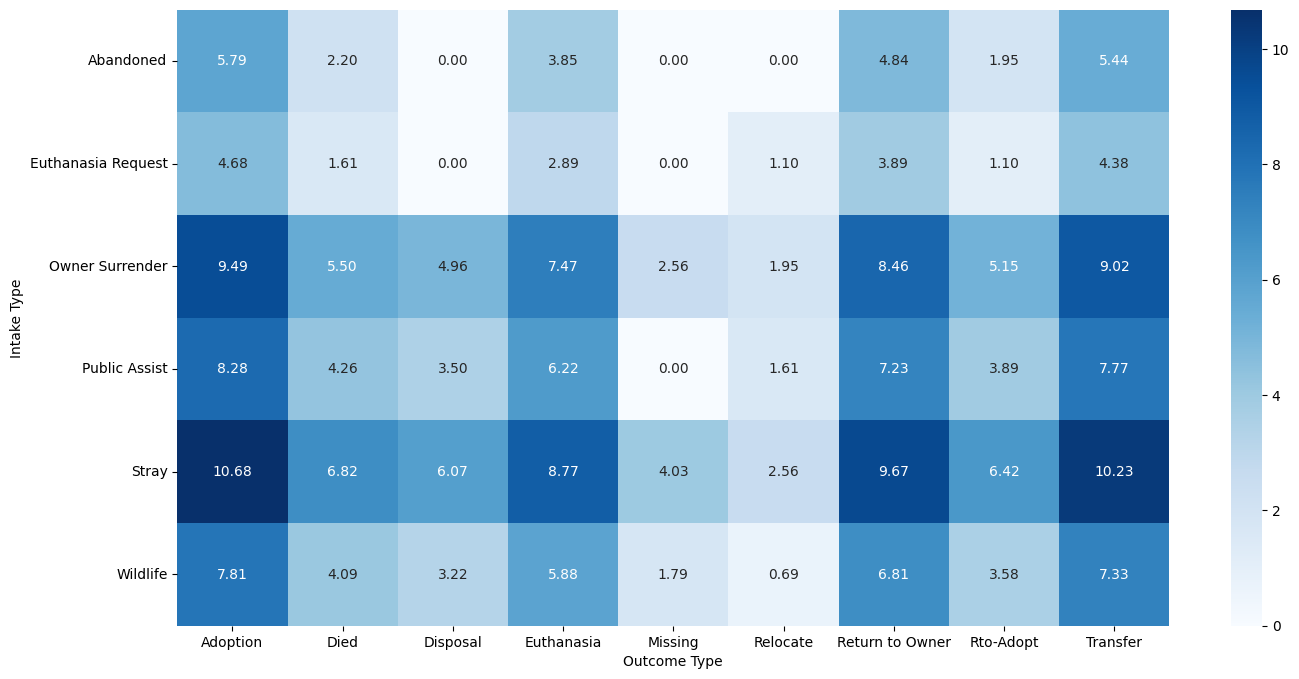

In [20]:
crosstab = pd.crosstab(intakes["Intake Type"], outcomes["Outcome Type"])

# +1 pro zabraneni logaritmovani nul
log_crosstab = np.log(crosstab + 1) 

fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(log_crosstab, ax=ax, annot=True, cmap="Blues", fmt=".2f")
ax.set_ylabel("Intake Type")
ax.set_xlabel("Outcome Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

Podle této heatmapy můžeme říct, že typ odchodu z útulku **závisí** na typu příchodu do útulku.
- Většina zvířat, která byla přijata jako `Stray` nebo `Owner Surrender`, je poté `adoptována`. Nejméně častým výsledkem typu opuštění útulku `Adoption` je příjem typu `Euthanasia request`.
- Typ opuštění útulku `Transfer` je nejčastější pro příjmy typu `Stray` a `Owner Surrender`.
- Typ opuštění útulku `Missing` je nejčastější pro příjem typu `Stray`.

##### **Hraje věk zvířete roli při adopci?**

**Vytvořím funkci pro rozdělení zviřat do 3 věkových skupin (rozdělení jsem vzala z prvního odkazu na googlu)**

In [21]:
def age_category(age):
    if age < 1:
        return 'young'
    elif age < 6:
        return 'adult'
    else:
        return 'senior'

*`Protože cílem je pozorovát adopci podle věku, udělala jsem stacked bar plot`*

C:\Users\maryt\AppData\Local\Temp\ipykernel_12528\4045699346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_counts = outcomes.groupby(['Categorical Age', 'Outcome Type']).size().unstack()


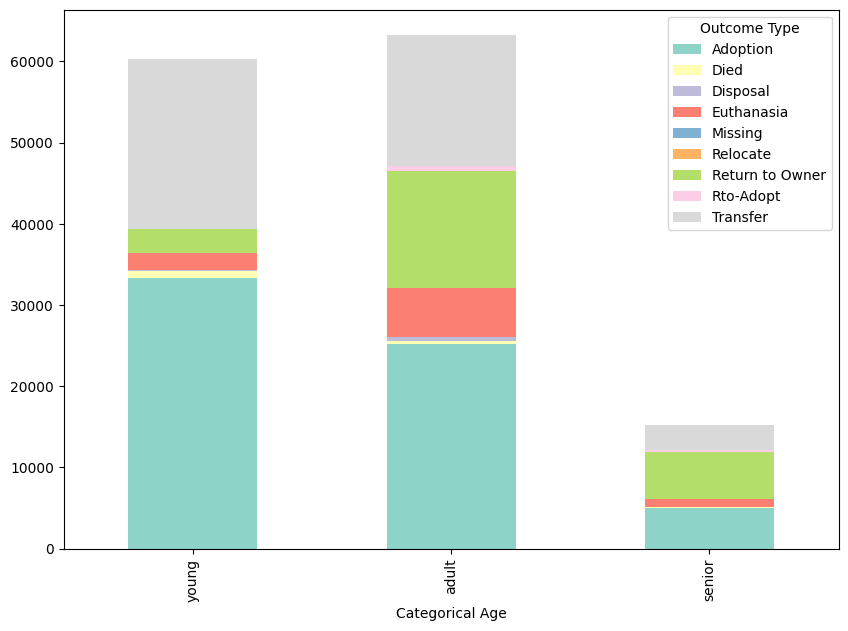

In [22]:
outcomes['Categorical Age'] = outcomes['Age upon Outcome'].apply(age_category)
outcome_counts = outcomes.groupby(['Categorical Age', 'Outcome Type']).size().unstack()

ordered_categories = ['young', 'adult', 'senior']

outcomes['Categorical Age'] = pd.Categorical(outcomes['Categorical Age'], categories=ordered_categories, ordered=True)

outcome_counts = outcome_counts.reindex(ordered_categories)
outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=sns.color_palette('Set3'))
plt.show()

Nyní z grafu můžeme vidět, že `většina` zvířat `mladších 1 roku` je `adoptována` (můžeme říci, že lidé mají tendenci adoptovat mladší zvířata). Zvířata ve věku od `1 do 6 let` (označila jsem je jako 'adult') jsou také nejčastěji `adoptována`, ale frekvence `převozu` a `návratu majiteli` je mnohem vyšší. Nakonec, zvířata ve věku `6 a více let` ('senior') jsou `adoptována méně často` než `vrácena majiteli` a celkově mnohem `méně často` než 2 `další kategorie`.

##### **Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?**

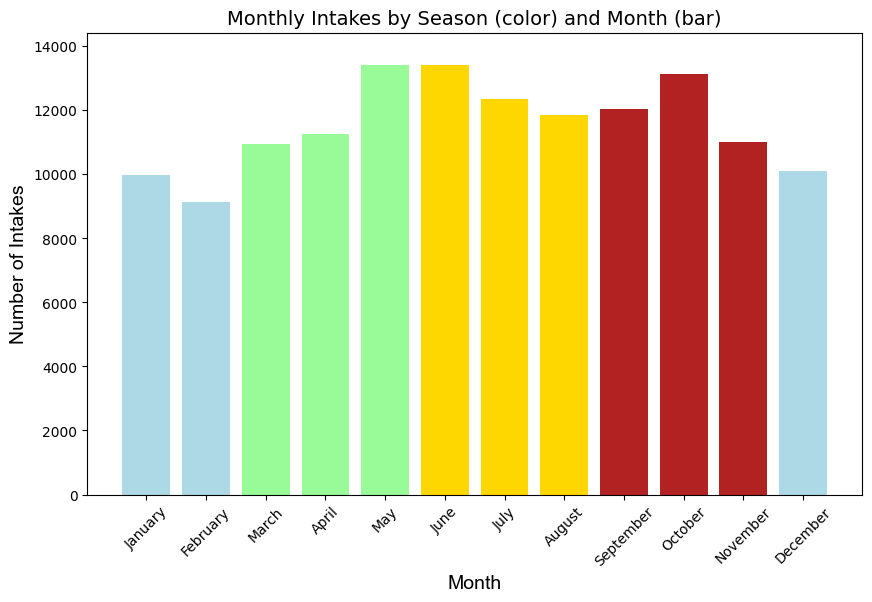

In [23]:
# vybereme jenom mesice a zgrupujeme data podle nich
intakes['Intake Month'] = intakes['DateTime'].dt.month
monthly_counts = intakes.groupby('Intake Month').size()

all_months = pd.Series(range(1, 13), name='Intake Month')
monthly_counts = monthly_counts.reindex(all_months, fill_value=0)

# map pro mesice
monthly_counts.index = monthly_counts.index.map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# map pro obdobi
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}

# map pro barvy obdobi
season_colors = {
    'Winter': 'lightblue',
    'Spring': 'palegreen',
    'Summer': 'gold',
    'Autumn': 'firebrick'
}

monthly_seasons = [season_map[k] for k in range(1, 13)]
colors = [season_colors[season_map[k]] for k in range(1, 13)]

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts, color=colors)
plt.xlabel('Month', fontname='Arial', fontsize=14)
plt.ylabel('Number of Intakes', fontname='Arial', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, max(monthly_counts) + 1000)
plt.title('Monthly Intakes by Season (color) and Month (bar)', fontsize=14)
plt.show()

Podle tohoto grafu lze říct, že příjem zvířat **`není`** v průběhu roku `konstantní`. `Nejvytíženějšími` měsíci jsou `květen` a `červen` a `nejméně vytíženými` měsíci jsou `zimní` měsíce.

## *❓ Vlastní otázky*

##### **Vztah Intake Condition a Animal Type. Jsou některé typy zvířat přijímány injured/feral/aged častěji než jiné?**


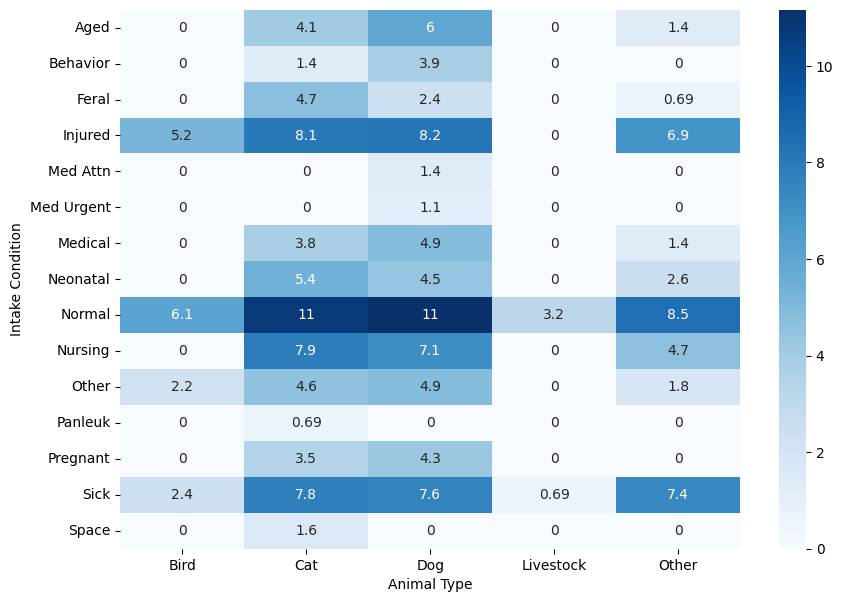

In [24]:
ct = pd.crosstab(intakes['Intake Condition'], intakes['Animal Type'])

# +1 pro zabraneni logaritmovani nul
ct_log = np.log(ct + 1)
plt.figure(figsize=(10,7))
sns.heatmap(ct_log,annot=True, cbar=True, cmap='Blues')
plt.show()

Ano, většina `starších` zvířat přijatých do útulku jsou `psi`. Většina `feral` zvířat jsou `kočky`. Počet zraněných (`injured`) koček a psů je zhruba stejný, přičemž psi tvoří 45 % a kočky téměř 40,5 %. `Trochu více` nemocných (`sick`) `koček` je přijímáno do útulku `než psů` a `jiných` typů zvířat.


##### **Kdy byly kočky adoptovány nejvíce/nejméně?**

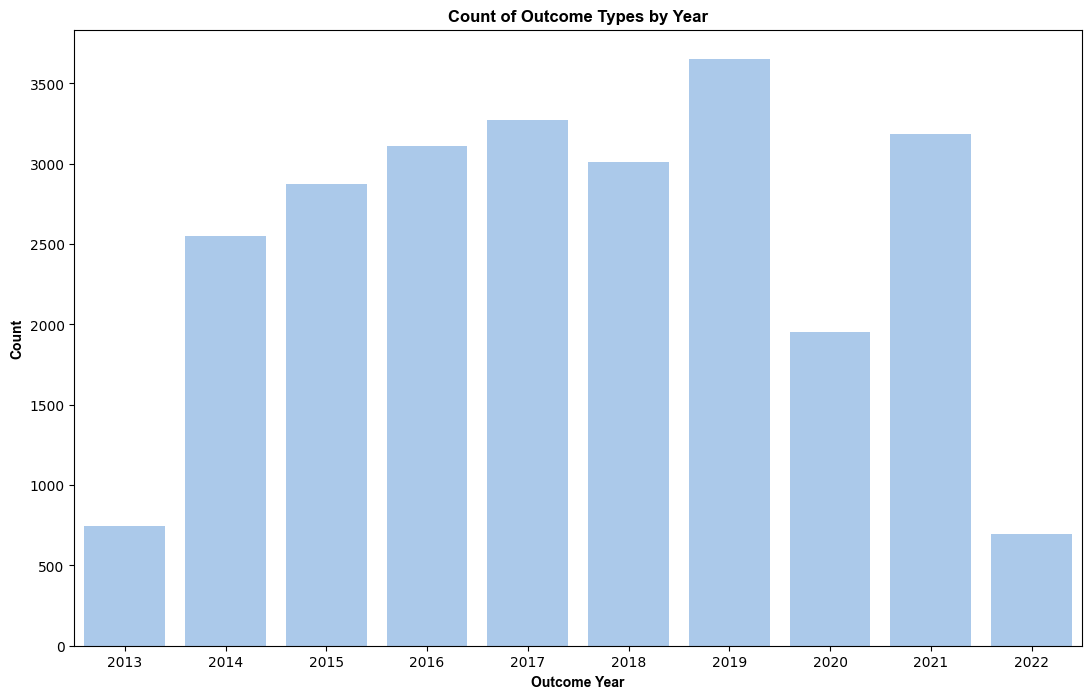

In [26]:
adoption_outcomes = outcomes[(outcomes['Animal Type'] == 'Cat') & (outcomes['Outcome Type'] == 'Adoption')]

outcomes['Outcome Year']=outcomes['DateTime'].dt.year

plt.figure(figsize=(13, 8))
sns.countplot(data=adoption_outcomes, x='Outcome Year', hue='Outcome Type', palette='pastel')
plt.title('Count of Outcome Types by Year', fontname='Arial', fontweight='bold')
plt.xlabel('Outcome Year', fontname='Arial', fontweight='bold')
plt.ylabel('Count', fontname='Arial', fontweight='bold')
plt.gca().legend_.remove()
plt.show()

Kočky byly `nejvíce` adoptovány v roce `2019`, rovněž v letech `2017` a `2021`. `Nejméně` adopcí koček bylo v letech `2013` a `2022`.

##### **Prace s datasetem `locations`**

**Načtěme si dataset locations**

In [27]:
locations = pd.read_csv('locations.csv')

**Seznámení s datasetem locations**

In [28]:
locations.info()
locations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Animal ID       102 non-null    object
 1   Found Location  102 non-null    object
 2   At AAC          102 non-null    object
 3   Intake Date     102 non-null    object
 4   Type            102 non-null    object
 5   Looks Like      102 non-null    object
 6   Color           102 non-null    object
 7   Sex             102 non-null    object
 8   Age             102 non-null    object
 9   Image Link      102 non-null    object
dtypes: object(10)
memory usage: 8.1+ KB


,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
0,A855691,"811 BURNSALL GATES DR78660\n(30.417121, -97.64...",Yes (come to the shelter),04/22/2022,Dog,Pit Bull Mix,Gray/White,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
1,A855620,8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...,Yes (come to the shelter),04/20/2022,Dog,Cairn Terrier Mix,Tan,Intact Male,3 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
2,A855431,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Male,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
3,A855432,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Female,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
4,A855461,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No (contact for more info),04/18/2022,Cat,Siamese,Flame Point,Intact Female,6 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...


Vidíme že všechny přiznaky mají type `object`, žadné `null-hodnoty` v zaznaméch `nejsou`

**Zkonvertujeme kategorické příznaky na typ `category`**

In [29]:
to_category_locations = ["At AAC", "Type", "Looks Like", "Color", "Sex"]
for col in to_category_locations:
    locations[col] = locations[col].astype("category")

**Převedeme přiznak `Age` na počítání v letech (float)**

In [30]:
locations['Age']=locations['Age'].apply(age_to_years)

**Převedeme přiznak `Intake Date` na správný format (datetime64)**

In [31]:
locations["Intake Date"] = pd.to_datetime(locations["Intake Date"], format = "%m/%d/%Y")

**Dropneme přiznak `Image Link`, ho nebudeme potřebovat**

In [32]:
locations.drop('Image Link', axis=1, inplace=True)

**Upravíme obsah přiznaku `At AAC` aby obsahoval jenom hodnoty `Ano` nebo `Ne` bez dalšího vesvětlení**

In [33]:
def fix_AAC(value):
    if "Yes" in value:
        return "Yes"
    else: 
        return "No"

locations["At AAC"] = locations["At AAC"].apply(fix_AAC)

##### **Porovnejte počet zviřat u dobrovolníků a v útulku**

,Frequency,Relative frequency (%)
At AAC,,
Yes,78,76.47
No,24,23.53


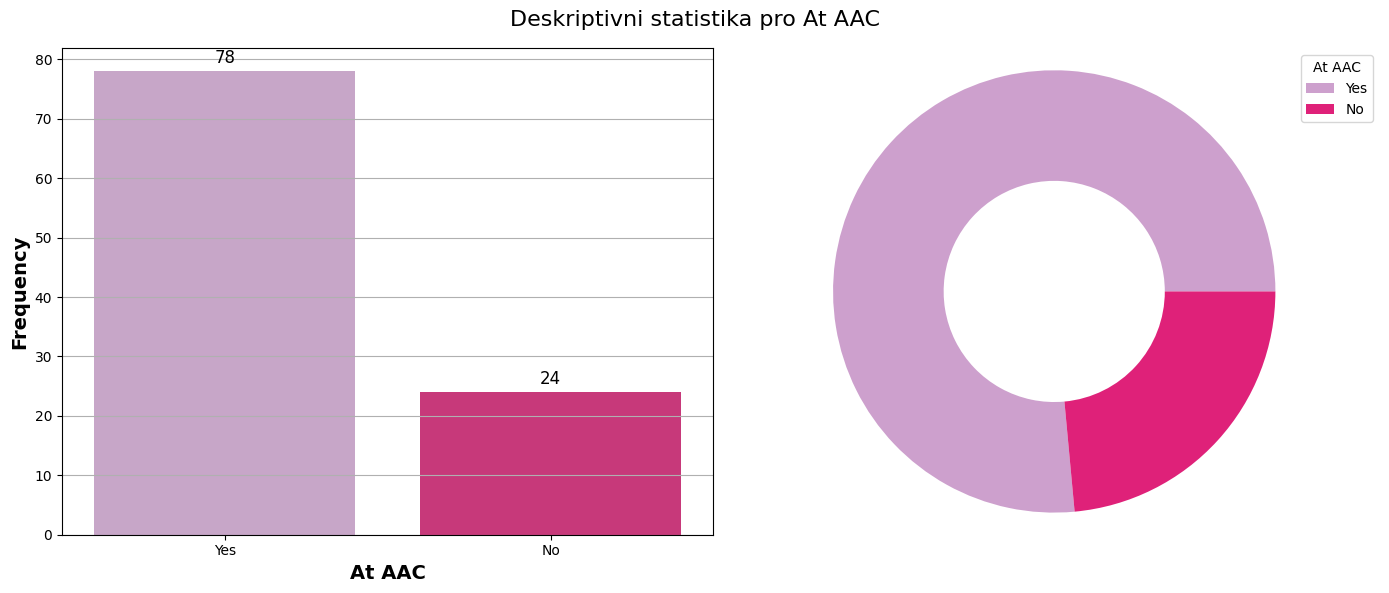

In [34]:
univariate_cat_ds(locations, 'At AAC')

Z grafu je vidět, že trochu víc než `tři čtvrtiny` zviřat jsou v `útulku`, zbyvájící `23.5%` jsou u `dobrovolníků`.